# Tercer Proyecto - Mínimos Cuadrados - Redes Convolucionales

## Estudiantes:
### Ricardo Murillo Jiménez - Carnet: 2018173697
### Ronald Esquivel López - Carnet: 2018093269

#Pregunta 1

In [1]:
# Bibliotecas requeridas

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

import pandas as pd
import numpy as np

In [2]:
df = pd.read_table("Datos\defaultofcredit.csv", delimiter =";") # leemos datos
df

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,689,0,0,0,0,1
1,120000,26,-1,2,0,0,0,2,2682,1725,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,34,0,0,0,0,0,0,29239,14027,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,0,0,0,0,0,0,188948,192815,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,43,-1,-1,-1,-1,0,0,1683,1828,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,37,4,3,2,-1,0,0,3565,3356,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,41,1,-1,0,0,0,-1,-1645,78379,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
targets = df['default_payment_next_month'] # target
targets

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default_payment_next_month, Length: 30000, dtype: int64

In [4]:
df.describe() # decribir datos

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
df.isnull().sum() # nulos

LIMIT_BAL                     0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

### Con esto calculamos el vector


\begin{equation}
\Rightarrow2\,A^{T}A\,\vec{x}-{(2\,\vec{b}^{T}A)}^{T}=0
\end{equation}

y tomando la transpuesta del segundo término:

\begin{equation}
\Rightarrow2\,A^{T}A\,\vec{x}-2\,A^{T}\,\vec{b}=0
\\
\Rightarrow A^{T}A\,\vec{x}=A^{T}\,\vec{b}
\\
\Rightarrow\vec{x}=\left(A^{T}A\right)^{-1}A^{T}\,\vec{b}
\end{equation}

De las propiedades de la pseudo-inversa sabemos que $\left(A^{T}A\right)^{-1}A^{T} = A^{+}$

**Entonces** 
\begin{equation}
\Rightarrow\vec{x}=A^{+}\,\vec{b}
\end{equation}

In [6]:
def estimateOptimunW(df, b): # función wopt
    Xt = df.transpose()
    paren = np.dot(Xt, df)
    parnInv = np.linalg.inv(paren)
    Amas = np.dot(parnInv, Xt)
    x = Amas.dot(df)
    return x
wopt = estimateOptimunW(df, targets)
print(wopt)

[[ 1.00000000e+00  6.10053457e-19  4.49082041e-20  5.49489360e-20
   5.68836081e-20  6.54011967e-20  6.40349593e-20  5.27134804e-20
   6.28141286e-15  6.49412151e-15  6.87326295e-15  4.56073009e-15
   2.73999573e-15  4.64146950e-15  1.67183975e-16  6.36209835e-16
  -3.05094491e-16 -1.12377555e-15  8.78800071e-16 -2.36030813e-16
   8.02365194e-21]
 [-3.34005988e-11  1.00000000e+00 -3.58850590e-16 -4.39174301e-16
  -4.50518190e-16 -5.08128289e-16 -4.84199185e-16 -4.26603909e-16
  -5.51103578e-11 -5.59117264e-11 -5.92732385e-11 -4.50544960e-11
  -3.17879056e-11 -4.93329821e-11 -8.45101766e-13 -3.78364007e-12
   1.15774057e-12  6.83764156e-12 -7.09521331e-12 -4.04121181e-13
  -7.97159647e-17]
 [ 2.84030480e-09  4.55922355e-13  1.00000000e+00  8.58007784e-15
   8.91536736e-15  9.71371963e-15  9.27859542e-15  9.32428776e-15
   2.06871850e-09  1.98758356e-09  2.14771174e-09  1.87610507e-09
   1.61310254e-09  1.65726988e-09  6.11493078e-11  1.29205091e-10
   1.69135816e-11  2.61266564e-11  1.8

# Pregunta 2

In [7]:
import torch as torch
import numpy as np
from torch.distributions import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


In [8]:
"""
Creates the data (2 classes) to be used for training, using a GMM distribution
@param numberSamplesPerClass, the number of samples per class
@param mean1, means for samples from the class 1
@param mean2, means for samples from the class 2
@param stds1, standard deviation for samples, class 1
@param stds2, standard deviation for samples, class 2
"""
def createData(numberSamplesPerClass = 2, mean1 = [2, 2], mean2 = [6, 6], stds1 = [3, 3], stds2 = [2, 1]):
    '''
    Creates data with gaussian distribution
    '''
    def createDataOneClass(means, covarianceMatrix, numberSamples):
        # Inits the bi gaussian data generator
        multiGaussGenerator = multivariate_normal.MultivariateNormal(means, covarianceMatrix)
        # Takes the samples
        samples = multiGaussGenerator.sample(torch.Size([numberSamples]))
        return samples
   
    means = torch.zeros(2)

    # Ones to concatenate for bias
    ones = torch.ones(numberSamplesPerClass, 1)
    means[0] = mean1[0]
    means[1] = mean1[1]
    # Covariance matrix creation with identity
    covarianceMatrix = torch.eye(2)
    covarianceMatrix[0, 0] = stds1[0]
    covarianceMatrix[1, 1] = stds1[1]
    samplesClass1 = createDataOneClass(means, covarianceMatrix, numberSamplesPerClass)
    means[0] = mean2[0]
    means[1] = mean2[1]
    covarianceMatrix[0, 0] = stds2[0]
    covarianceMatrix[1, 1] = stds2[1]
    samplesClass2 = createDataOneClass(means, covarianceMatrix, numberSamplesPerClass)
    # Concatenates the ones for the bias
    samplesClass1Bias = torch.cat((ones, samplesClass1), 1)
    samplesClass2Bias = torch.cat((ones, samplesClass2), 1)
    samplesAll = torch.cat((samplesClass1, samplesClass2), 0)
    
    #Plot clases
    plt.scatter(samplesClass1[:, 0], samplesClass1[:, 1], marker='^', c='yellow')
    plt.scatter(samplesClass2[:, 0], samplesClass2[:, 1], marker='o', c='darkmagenta')
    plt.show()
  
    #Create samples with bias
    samplesAllBias = torch.cat((samplesClass1Bias, samplesClass2Bias), 0)
    
    #Create targets
    targetsClass1 = torch.ones(numberSamplesPerClass, 1)
    targetsClass2 = -1 * torch.ones(numberSamplesPerClass, 1)
    targetsAll = torch.cat((targetsClass1, targetsClass2), 0)
    
    return (targetsAll, samplesAllBias)

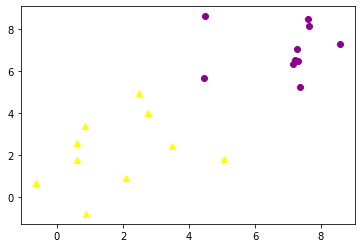

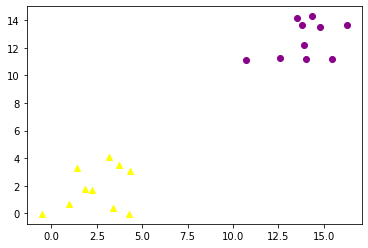

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return array(a, dtype, copy=False, order=order, subok=True)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


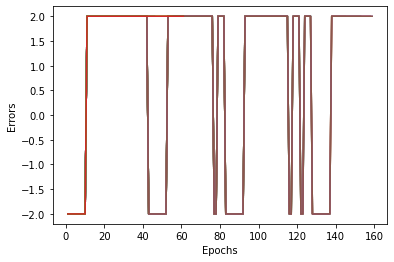

In [9]:
def train(weight1,weight2,weight3,col1,col2,col3,epochs,theta,lmbda,result,sample_len):
  errors_list = []
  epochs_list = []
  are_errors = True
  while (are_errors == True):
    output = ((col1 * weight1) + (col2 * weight2) + (col3 * weight3)) - theta #columna de valores de salida
    are_errors = False
    for i in range(0,len(output)):
      if output[i] >= 0: #se normaliza en funcion escalon
        val = 1
      else:
        val = -1
      if (result[i] != val):
        error = result[i] - val
        epochs += 1
        errors_list.append(error)
        epochs_list.append(epochs)
        theta = theta + (-(lmbda * error)) #cambio de umbral
        weight1 = weight1 + (col1[i] * error * lmbda) #ajustar el peso
        weight2 = weight2 + (col2[i] * error * lmbda)
        weight3 = weight3 + (col3[i] * error * lmbda)
        are_errors = True
    plt.plot(epochs_list,errors_list)
    plt.ylabel('Errors')
    plt.xlabel('Epochs')                 
                  
if __name__ == "__main__":
  (result,samples) = createData(numberSamplesPerClass = 10, mean2 = [7, 7])
  (result2,samples2) = createData(numberSamplesPerClass = 10, mean2 = [13, 13])
  theta = 0.2
  lmbda = 0.9 #grado de aprendizaje
  peso1 = 1
  peso2 = 1
  peso3 = 1
  epochs = 0
  col1 = samples[:,0]
  col2 = samples[:,1]
  col3 = samples[:,2]
  len_muestras = len(result)
  train(peso1,peso2,peso3,col1,col2,col3,epochs,theta,lmbda,result2,len_muestras)
  col1 = samples2[:,0]
  col2 = samples2[:,1]
  col3 = samples2[:,2]
  train(peso1,peso2,peso3,col1,col2,col3,epochs,theta,lmbda,result,len_muestras)
  


# Pregunta 3
información obtenida de: https://www.kaggle.com/gpiosenka/100-bird-species

In [10]:
# Bibliotecas
   
import numpy as np # vectores, matrices grandes y multidimensionales, y funciones para estas

# Para graficar
%matplotlib inline
import matplotlib.pyplot as plt

#Bibliotecas generales
import torch
import torchvision
import torchvision.transforms as transforms # transformaciones generales


# Redes neuronales
import torch.nn as nn
import torch.nn.functional as F


# Pérdida y optimización
import torch.optim as optim

import os
import random

Cargar y normalizar los datos

In [11]:
# Dirección de los directorios con las imagenes a usar para etrenar y testear
train_dir = '../Proyecto3/Dataset/train' # entreno
test_dir = '../Proyecto3/Dataset/test' # testeo
classes = os.listdir(train_dir) # Preparamos una lista con todas las clases de aves
print(len(classes))
print(classes)

310
['AFRICAN CROWNED CRANE', 'AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'ANHINGA', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ARARIPE MANAKIN', 'ASIAN CRESTED IBIS', 'BALD EAGLE', 'BALD IBIS', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BANDED BROADBILL', 'BANDED PITA', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BEARDED BELLBIRD', 'BEARDED REEDLING', 'BELTED KINGFISHER', 'BIRD OF PARADISE', 'BLACK & YELLOW bROADBILL', 'BLACK BAZA', 'BLACK FRANCOLIN', 'BLACK SKIMMER', 'BLACK SWAN', 'BLACK TAIL CRAKE', 'BLACK THROATED BUSHTIT', 'BLACK THROATED WARBLER', 'BLACK VULTURE', 'BLACK-CAPPED CHICKADEE', 'BLACK-NECKED GREBE', 'BLACK-THROATED SPARROW', 'BLACKBURNIAM WARBLER', 'BLONDE CRESTED WOODPECKER', 'BLUE COAU', 'BLUE GROUSE', 'BLUE HERON', 'BLUE THROATED TOUCANET', 'BOBOLINK',

In [12]:
from torchvision.datasets import ImageFolder

# Normalización: multiple images are put into a common statistical distribution in terms of size and pixel values
# Data normalization is an important step which ensures that each input parameter (pixel, in this case)
# has a similar data distribution. This makes convergence faster while training the network. ...
# The distribution of such data would resemble a Gaussian curve centered at zero

# To normalize
transform = transforms.Compose( # Transforms are common image transformations. 
    [transforms.Resize(112), # cambiamos tamaño a 112x112
        transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = ImageFolder(train_dir, transform=transform) # Image folder ocupa que las imagenes esten separadas en folderse
                                                    # cada folder siento la etiqueta(label) de cada imagen
testset = ImageFolder(test_dir, transform=transform)

In [13]:
print(trainset)

Dataset ImageFolder
    Number of datapoints: 45278
    Root location: ../Proyecto3/Dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=112, interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


In [14]:
# view one image shape of the dataset.
img, label = trainset[random.randrange(0, 45278)]
print(img.shape)

torch.Size([3, 112, 112])


In [15]:
train_size = len(trainset)
test_size = len(testset)
print(train_size, test_size)

45278 1550


In [16]:
train_ds = trainset
test_ds = testset

len(train_ds),len(test_ds)   

(45278, 1550)

In [17]:
from torch.utils.data.dataloader import DataLoader

batch_size = 32
train_loader = DataLoader(trainset, batch_size, shuffle=True, num_workers=2, pin_memory=True) 
test_loader = DataLoader(testset, batch_size, num_workers=2, pin_memory=True)

## Explorar los datos

In [18]:
# Mostar la imagen
def imshow(img):
    img = img / 2 + 0.5     # Desnormalizar
    npimg = img.numpy()
    print('Label: ', trainset.classes[label], "("+str(label)+")")
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Label:  COCK OF THE  ROCK (77)


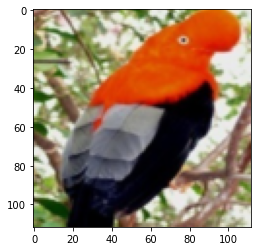

In [19]:
imshow(img)

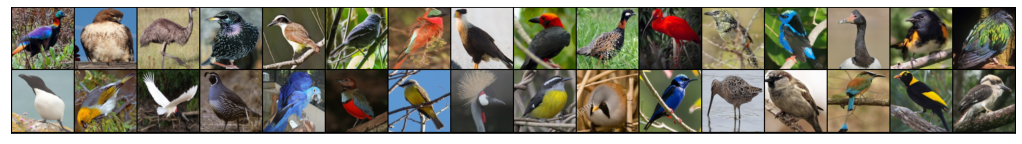

In [20]:
import matplotlib.pyplot as plt

for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(18,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(torchvision.utils.make_grid(images/ 2 + 0.5 , nrow=16).permute(1,2,0))
    break

## Definir la red convolucional

In [ ]:
# Crear el modelo de aprendizaje profundo, se crea una clase 
# que envuelve la clase nn.Module 

class CNNet(nn.Module):
    # Modelo de red convolucional.
    # :params
    #    torch.nn.Module clase que implenta la funionalidad de
    #    redes neuronales de Pytorch 

    def __init__(self): 
        # Función para definir e inicializar la red.
        super(CNNet, self).__init__()

        #capa convolucional
        #torch.nn.Conv2d(in_channels, out_channels, kernel_size...
        self.conv1 = nn.Conv2d(3, 6, 5)

        #torch.nn.MaxPool2d(kernel_size, stride,...        
        self.pool = nn.MaxPool2d(2, 2)  

        #torch.nn.Conv2d(in_channels, out_channels, kernel_size...
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        #Capas perceptrón del modelo
        self.fc1 = nn.Linear(16 * 25 * 25, 5000)
        
        self.fc2 = nn.Linear(5000, 1000)
        
        #Salida a 10 clases 
        self.fc3 = nn.Linear(1000, 310)

    def forward(self, x):
        # Aplica el modelo a los datos de entrada.
        # :param
        #   x : datos de la imagen a procesar.
        
        #Pase de la entrada por todas las capas de la red.
        #print("Tamaño del x de entrada al entrenamiento:" , x.shape)

        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #cont = 1;
        #if(cont == 1):
            #print(x.size(0)) # torch.Size([64, 128, 10, 10])
            #print(x.shape)
            # print(x)
            #cont +=1
        #print("Tamaño de x luego de la convolución y pool:", x.shape)
        x = x.view(-1, 16 * 25 * 25)
        #x = torch.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = CNNet()

## Definir los hiperparametros, por ejemplo, funcion de perdida, el optimizador, entre otros.

Se utiliza la función de pérdida de entropía cruzada y optimización por descenso de gradiente estocástico (Stochastic Gradient Descent - SGD).

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

## Entrenar la red

In [ ]:
# cantidad de ciclos de entrenamiento o épocas
numEpoch = 3

for epoch in range(numEpoch):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        #print("i: ",i)
        # obtener los datos de entrada; 
        # data es una lista de la forma [inputs, labels]
        inputs, labels = data
        #               print("inputs, label")
        #print(inputs, labels)
        # inicializar los parámetros del gradiente.
        optimizer.zero_grad()
        #              print("optimizer")
        # Se realizan las predicciones con el modelo. 
        # Este código ejecuta el forward de las entradas.
        outputs = net(inputs)
        #        print("outputs")
        # Se calcula la pérdida utilizando Cross Entropy Loss
        loss = criterion(outputs, labels)       
        loss.backward()
        
        #El optimizador realiza las actualizaciones a través del método step().
        optimizer.step()

        # imprimir estadisticas
        #           print("antes del if i")
        running_loss += loss.item()
        if i % 100 == 99:    # imprimir mensaje cada 2000 mini-batches
            print('[%d, %5d] pérdida: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Fin del entrenamiento')

## Evaluar el modelo resultante Accuracy, Precision, Recall y F1 (investigue como se utilizan estas medidas en clasificación)

Para verrificar si el resultado del entrenamiento es el esperado se debe evaluar el modelo con los datos de prueba.

Inicialmente se puede comprobar cómo se comporta el modelo con algunos de los datos de prueba.

In [ ]:
dataiter = iter(test_loader)
images, labels = dataiter.next() # batchsizze
print(labels)
# imprimir algunos ejemplos y la etiqueta original (la verdad)
imshow(torchvision.utils.make_grid(images))
print('Etiqueta verdadera: ', ' '.join('%5s -' % classes[labels[j]] for j in range(batch_size)))

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicción: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(batch_size)))

In [ ]:
# Se toma todos los datos de prueba y se verifica si el modelo realiza
# bien la predicción para cada uno. 

#Cantidad de imágenes clasificadas correctamente.
correct = 0

#Imágenes totales
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Exactitud de la red en las 1550 imágenes de prueba: %d %%' % (
    100 * correct / total))

# Indica de el total de indices a probar, cual fue el porcentaje correctos, distinto a lo que se prueba en la siguiente prueba
print('Precisión de la red: %d %%' % (
    100 * correct / total))

# Indica cual es el total en el cual la predicción fue perfecta
print('exhaustividad de la red: %d de 1150 %%' % (
    correct))

# F1 2*((precision/recall)/(precision+recall)))
F1 = 2*3

In [ ]:
# Se toma todos los datos de prueba y se verifica si el modelo realiza
# bien la predicción para cada una de las 10 clases individuales. 

# Cantidad de imágenes correctamente clasificadas por clase
class_correct = list(0. for i in range(310))
Total_img = 0
Total_img_correct = 0

# Cantidad de imágenes por clase.
class_total = list(0. for i in range(310))

#Para todas las imágenes de prueba se realiza el forward
# y se evalúa si el resultado fue el correcto y la clase 
# a la que pertenece la imagen.
with torch.no_grad():
    for data in test_loader:
        #Se dividen las imágenes de las etiquetas.
        images, labels = data
        #Se clasificacn las imágenes usando el modelo.
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        
        #Se compara el resultado de la predicción con el 
        # valor esperado y se cuentan los casos exitosos por clase.
        c = (predicted == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

# Se imprime el resultado
for i in range(310):
    print('Exactitud en %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
    

## Presentar al menos cuatro conclusiones
- Al estar investigando sobre el uso de la herramienta pytorch nos dimos cuenta de la gran cantidad de posibilidades que hay para la resolución del problema planteado; las cuales se adaptan a muchas circunstancias y la forma en general en la que el desarrollador quiera su idea.
- La correcta implementación de una red neuronal es algo díficil de alcanzar en varias ocasiones debido a la gran cantidad de aspectos que influyen en la misma. No solo los parametros en sí mismo de la Red si no la manipulación de los archivos con los que hay trabajar y demás aspectos.
- La forma en la que unas simples operaciones matemáticas pueden llegar a detectar patrones tan complejos y ayudar a distintas áreas de estudio en las que el ser humano tiene una limitación importante en lo que es la eficacia con la que podría hacer lo mismo manualmente es realmente fascinante.
- Al tener tantas categorías en las que se pueden clasificar las imágenes, la correcta clasificación de las imágenes se complicación un poco, debido a que muchas aves(en este caso), pueden llegar a tener patrones en sus plumas o morfología muy parecidas.

In [ ]:
###### ITCR - Sede Interuniversitaria de Alajuela
###### Curso IC-6200 - Inteligencia Artificial
###### Aprendizaje supervisado - Mínimos Cuadrados
###### Redes Neuronales Convolucionales (CNN)
###### Profesora: María Mora